# MA-308/MA-M08 Lab 3: Automatic differentiation with autograder and application to the ADAM gradient descent

## Introduction to autograder

- autograd is an automatic differentiator, computes derivatives of arbitrary complex functions, using python and numpy functions
- Using autograd is convenient with respect to computing the gradient by hand
- To use autograd, you would need to activate the mlcourse environment. From a terminal:

conda activate mlcourse

- Then run jupyter-notebook from that terminal (see notes for lab 1)

- You would need to import autograd functions in your python notebook:

from autograd import grad (compute gradient)
from autograd import value_and_grad (compute value and gradient)


Autograd can be used as follows:
    
- First we define the function: 


In [29]:
def g(w):
    return np.tanh(w)

#or

g = lambda w: np.tanh(w) 

In [30]:
# Then, we compute the gradient as in the examples (commented to avoid errors in this snippet):

#dgdw=grad(w) (gradient)
#d2gdw2=grad(dgdw) (second derivatives)

individual partial derivatives:

$\frac{\partial g}{\partial w_1}$: 	grad(g,0)

$\frac{\partial g}{\partial w_2}$:  	grad(g,1)

$\frac{\partial g}{\partial w_n}$:  	grad(g,n-1)

## Example python code for the ADAM version of the gradient descent using autograder

#### This is needed for Matplotlib to play well in notebooks

In [31]:
%matplotlib inline

#### import basic libraries and autograd wrapped numpy

In [32]:
# import sys
# sys.path.append('../')

import autograd.numpy as np
import copy
import matplotlib.pyplot as plt
from autograd import value_and_grad

#### These instructions are needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline matplotlib notebook

In [33]:
from matplotlib import rcParams
rcParams['figure.autolayout'] = True
plt.rcParams['text.usetex'] = True

#### Gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)

In [34]:
def gradient_descent(g,alpha_choice,beta,max_its,w):
    
    gradient=value_and_grad(g)
    
    # run the gradient descent loop
    weight_history = [] # container for weight history
    cost_history = [] # container for corresponding cost function history
    cost_eval,grad_eval = gradient(w)
    # initialization for momentum direction
    h = np.zeros((w.shape))
    for k in range(max_its):
        # check if diminishing steplength rule used
        if alpha_choice == 'diminishing':
            alpha = 1/float(k+1)
        else:
            alpha = alpha_choice
        # evaluate the gradient, store current weights and cost function value
        cost_eval,grad_eval = gradient(w)
        weight_history.append(w)
        cost_history.append(cost_eval)
        
        #### momentum step ###
        h = beta*h - (1 - beta)*grad_eval
        # take gradient descent step
        w = w + alpha*h
    # collect final weights
    weight_history.append(w)
    cost_history.append(cost_eval)
    return weight_history,cost_history

#### Define function, starting point, iterations and step

Function: $g(w_1,w_2) = 0.5 w_1^2 + 9.75 w_2^2$ 

Starting point: $\vec{w}_0 = (10,0)$

Max iterations: 25

Fixed step size $\alpha = 0.1$

In [38]:
# Function
# g = lambda w: 0.5*w[0]*w[0]+9.75*w[1]*w[1]
g = lambda w: np.cosh(3*(w[0]**2) + 2*w[0]*w[1] + w[1]**2)
points = np.array([(0.91, 1.71), (1.82, 3.66), (2.99, 6.04), (4.08, 8.15), (5.09, 
  10.14), (6.13, 12.34)])
g = lambda w: np.sum(  np.apply_along_axis(lambda x: (w[0]*x[0]+w[1]-x[1])**2,axis=1,arr=points) )/6
# initial parameters
w = np.array([0.001,0.0]); max_its = 25; alpha = 10**(-1);
value_and_grad(g)(np.array([1,0.5]))

(12.406600000000003, array([-27.6879    ,  -6.00666667]))

#### Perform runs for three values of beta

#### Perform runs for three values of beta

In [39]:
# run 1
beta=0
weight_history_1,cost_history_1 = gradient_descent(g,alpha,beta,max_its,w)
print("beta=0.0: cost, weight:", cost_history_1[max_its], 
weight_history_1[max_its])

# run 2
beta=0.2
weight_history_2,cost_history_2 = gradient_descent(g,alpha,beta,max_its,w)
print("beta=0.1: cost, weight:", cost_history_2[max_its], 
weight_history_2[max_its])

# run 3
beta=0.7
weight_history_3,cost_history_3 = gradient_descent(g,alpha,beta,max_its,w)
print("beta=0.7: cost, weight:", cost_history_3[max_its], 
weight_history_3[max_its])

beta=0.0: cost, weight: 7.196741732516107e+18 [1.46699877e+09 3.35126737e+08]
beta=0.1: cost, weight: 5797563.0579452 [730.41200749 166.52198328]
beta=0.7: cost, weight: 0.017153143537810372 [1.99998109 0.1225758 ]


#### Plot the cost function history for the runs above

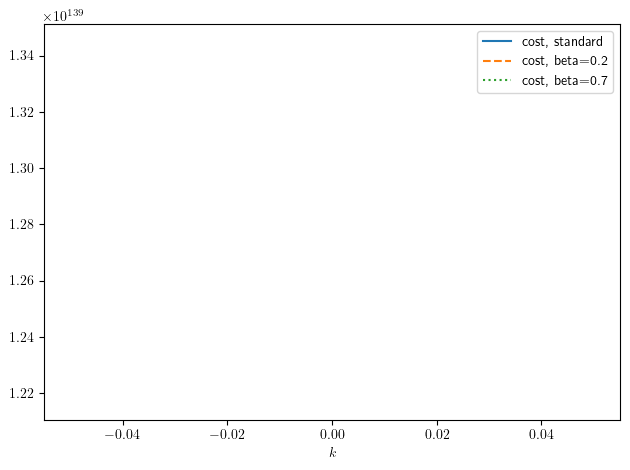

In [7]:
plt.xlabel(r'$k$')
plt.plot(cost_history_1, linestyle='solid', label="cost, standard")
plt.plot(cost_history_2, linestyle='dashed', label="cost, beta=0.2")
plt.plot(cost_history_3, linestyle='dotted', label="cost, beta=0.7")
plt.legend()
plt.show()

#### Plot the weight history for a given run

before
after


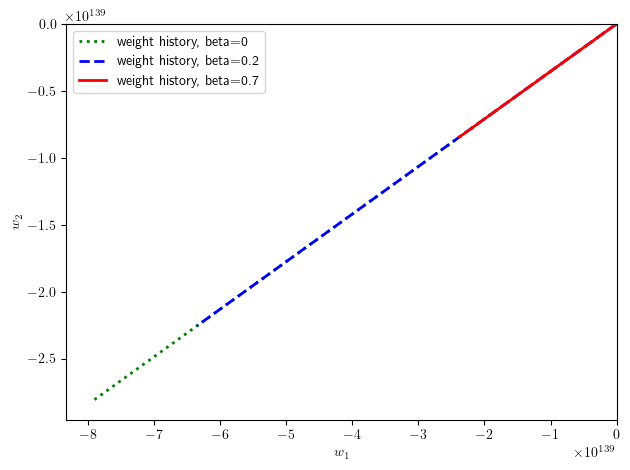

In [38]:
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')
x=np.zeros(max_its+1)
y=np.zeros(max_its+1)
for i in range(max_its+1):
     x[i]=weight_history_1[i][0]
     y[i]=weight_history_1[i][1]
     
plt.plot(x,y, linestyle='dotted', linewidth=2, color = 'g', label="weight history, beta=0")
for i in range(max_its+1):
     x[i]=weight_history_2[i][0]
     y[i]=weight_history_2[i][1]
     
plt.plot(x,y, linestyle='dashed', linewidth=2, color = 'b', label="weight history, beta=0.2")
for i in range(max_its+1):
     x[i]=weight_history_3[i][0]
     y[i]=weight_history_3[i][1]
     
plt.plot(x,y, linestyle='solid', linewidth=2, color = 'r', label="weight history, beta=0.7")
#include contour plot of g(w)
xlist = np.linspace(-1.0, 10.0, 100)
ylist = np.linspace(-2.0, 2.0, 100)
X, Y = np.meshgrid(xlist, ylist)
XY=np.array([X,Y])
Z=g(XY)
plt.contour(X,Y,Z, colors='lightgrey')   #with lines
# plt.contourf(X,Y,Z)   #filled with colours
plt.legend()
print("before")
plt.savefig("test.png")
print("after")
plt.show()

## Exercise

In the code above, replace the original function with 

$g(x) = \cosh (3 x^2 + 2 x y  + y^2)$

and run the notebook again. 